# Pandas Built-in Data Visualization



## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('df31.csv', index_col=0)
df2 = pd.read_csv('df32.csv')

# Plot Types

There are several plot types built into pandas; most of them are statistical by nature:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
df.plot.box()      box plot
df.plot.kde()      kde plot
df.plot.hexbin()   hexagonal bin plot
df.plot.pie()      pie chart</pre>

You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

___
## Histograms
This is one of the most commonly used plots. Histograms describe the distribution of continuous data by dividing the data into "bins" of equal width, and plotting the number of values that fall into each bin. 

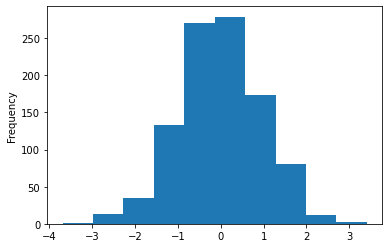

In [3]:
df1['A'].plot.hist()

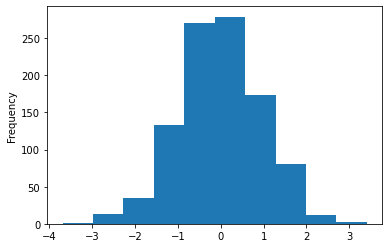

In [4]:
df1['A'].plot.hist();

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins:

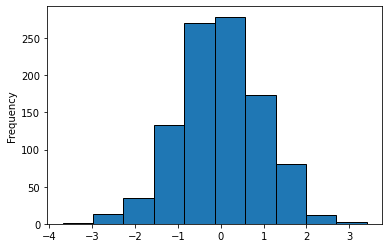

In [5]:
#Parameters: This method accepts the following parameters.

    #enable : If this parameter is True (default) turns autoscaling on, False turns it off.
    #axis: This parameter is used to which axis to be operate on. {‘both’, ‘x’, ‘y’}
    #tight: This parameter is forwarded to autoscale_view.
    #autoscale : You can control the scaling

df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both')

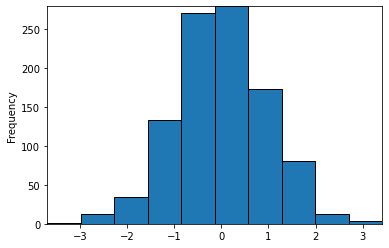

In [6]:
df1['A'].plot.hist(edgecolor='k').autoscale(enable=True, axis='both', tight=True) #to ensure there is no empty space

We can add settings to do things like bring the x- and y-axis values to the edge of the graph, and insert lines between vertical bins, Further we can use any [matplotlib color spec](https://matplotlib.org/api/colors_api.html) for **edgecolor**, such as `'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'`, or the string representation of a float value for shades of grey, such as `'0.5'`

For **autoscale** the axis can be set to `'x'`, `'y'` or `'both'`

We can also change the number of bins (the range of values over which frequencies are calculated) from the default value of 10:

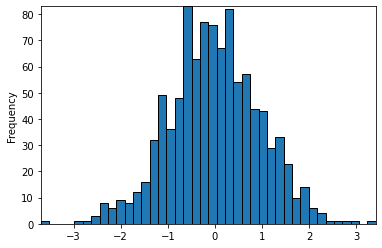

In [7]:
#bins = controls no of bins i histogrm, if bins are two high then you may have empty spaces in your 
#courve as you may not have value on that range
df1['A'].plot.hist(bins=40, edgecolor='k').autoscale(enable=True, axis='both', tight=True)

<div class="alert alert-info"><strong>NOTE:</strong> Histograms are also accessible with <tt><font color=black>df.hist()</font></tt>, but some changes are made to the default formatting (dropped y-axis label, addition of gridlines)</div>

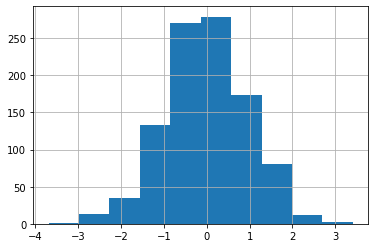

In [8]:
df1['A'].hist();

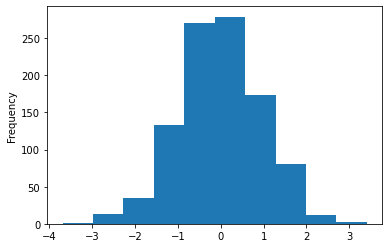

In [9]:
df1['A'].hist(grid=False).set_ylabel("Frequency");

For more on using <tt>df.hist()</tt> visit https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

## Barplots
Barplots are similar to histograms, except that they deal with discrete data, and often reflect multiple variables.

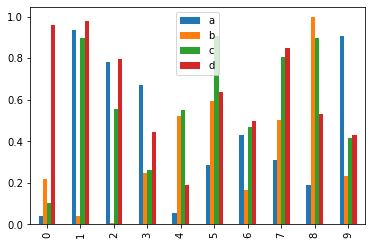

In [10]:
df2.plot.bar();

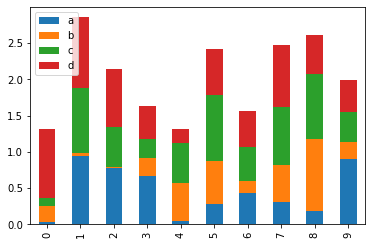

In [11]:
df2.plot.bar(stacked=True);

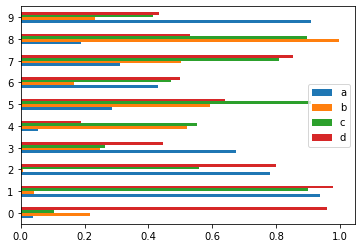

In [12]:
# USE .barh() TO DISPLAY A HORIZONTAL BAR PLOT
df2.plot.barh();

## Line Plots
Line plots are used to compare two or more variables. By default the x-axis values are taken from the index.>

Line plots happen to be the default pandas plot. They are accessible through <tt>df.plot()</tt> as well as <tt>df.plot.line()</tt>

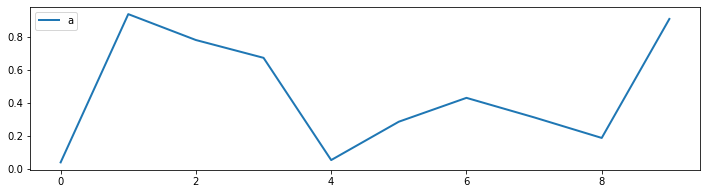

In [13]:
# df2.plot(), will also give the same result.
#Figsize = Dimension of Canvas
df2.plot.line(y='a',figsize=(12,3),lw=2); #a is column 

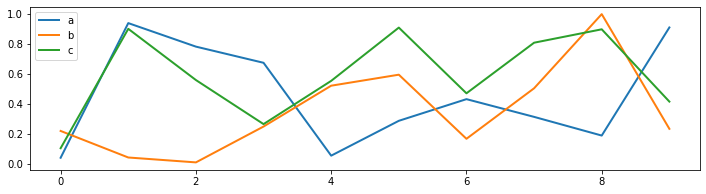

In [14]:
df2.plot.line(y=['a','b','c'],figsize=(12,3),lw=2);

## Area Plots
Area plots represent cumulatively stacked line plots where the space between lines is emphasized with colors. 

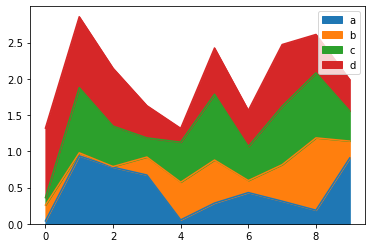

In [15]:
df2.plot.area();

It often helps to mute the colors by passing an <strong>alpha</strong> transparency value between 0 and 1.

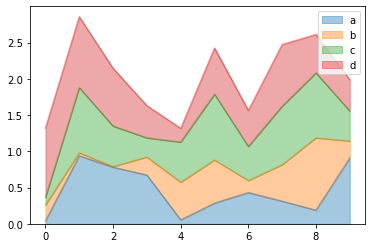

In [16]:
df2.plot.area(alpha=0.4);

To produce a blended area plot, pass a <strong>stacked=False</strong> argument:

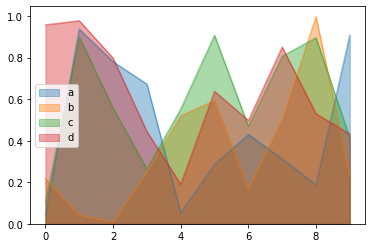

In [17]:
df2.plot.area(stacked=False, alpha=0.4);

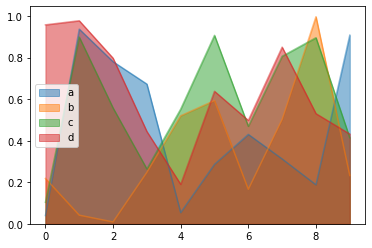

In [18]:
df2.plot.area(stacked=False);

## Scatter Plots
Scatter plots are a useful tool to quickly compare two variables, and to look for possible trends. 

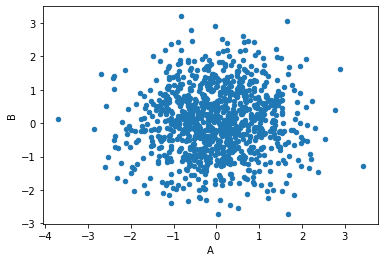

In [19]:
df1.plot.scatter(x='A',y='B');

In [38]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


### Scatter plots with colormaps
You can use <strong>c</strong> to color each marker based off another column value. Use `cmap` to indicate which colormap to use.<br>
For all the available colormaps, check out: http://matplotlib.org/users/colormaps.html

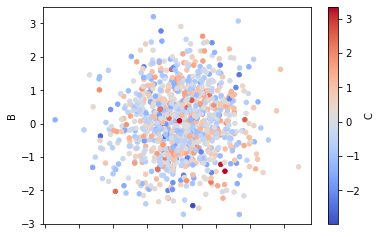

In [20]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm');

<div class="alert alert-danger"><strong>NOTE:</strong> As of pandas 0.23.4 there is a <a href='https://github.com/pandas-dev/pandas/issues/10611'>known issue</a> where colormaps chop off the x-axis tics.<br>This is due to be fixed in an <a href='https://github.com/pandas-dev/pandas/pull/20446'>upcoming release</a>. For now, the following matplotlib code will work:</div>

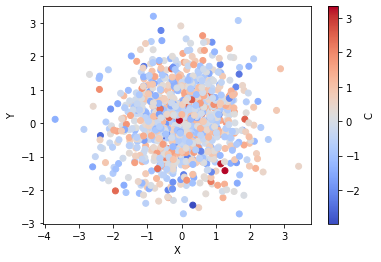

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df1['A'],df1['B'],c=df1['C'],cmap='coolwarm')
plt.colorbar().set_label('C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## BoxPlots
Box plots, aka "box and whisker diagrams", describe the distribution of data by dividing data into <em>quartiles</em> about the mean.<br>
Look <a href='https://en.wikipedia.org/wiki/Box_plot'>here</a> for a description of boxplots. <a href='https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots'>[reference]</a>

<div class="alert alert-danger"><strong>NOTE:</strong> At this time we recommend using <tt><font color=black>df.boxplot()</font></tt> instead of <tt><font color=black>df.plot.box()</font></tt> as certain operations such as groupby currently do not work properly in <tt>df.plot.box()</tt>. For more information visit <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html'>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html</a></div></div>

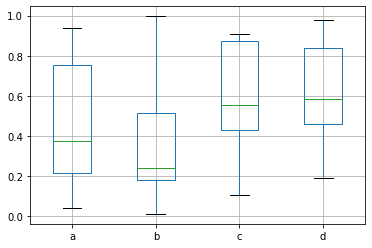

In [22]:
#Boxplot = box plot shows how many distributions are present
df2.boxplot();

### Boxplots with Groupby
To draw boxplots based on groups, first pass in a list of columns you want plotted (including the groupby column), then pass <strong>by='columname'</strong> into <tt>.boxplot()</tt>. Here we'll group records by the <strong>'e'</strong> column, and draw boxplots for the <strong>'b'</strong> column.

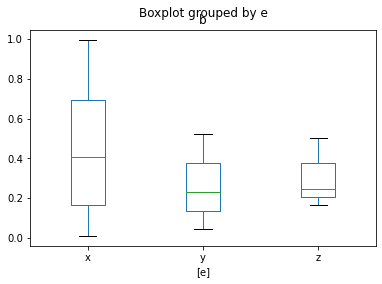

In [23]:
df2[['b','e']].boxplot(by='e', grid=False);

In the next section on Customizing Plots we'll show how to change the title and axis labels.

## Kernel Density Estimation (KDE) Plot
These plots are accessible either through <tt>df.plot.kde()</tt> or <tt>df.plot.density()

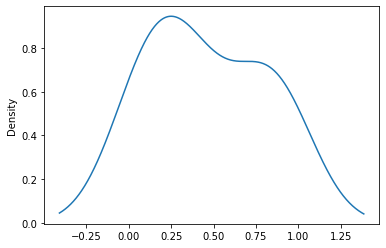

In [24]:
#KDE -It’s a technique that let’s you create a smooth curve given a set of data.
df2['a'].plot.kde();

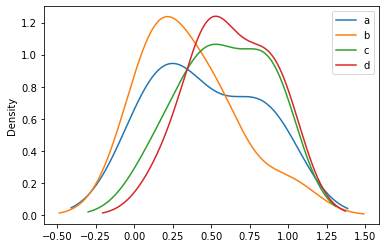

In [25]:
df2.plot.density();

## Colors, Widths and Linestyles
The pandas <tt>.plot()</tt> method takes optional arguments that allow you to control linestyles, colors, widths and more.

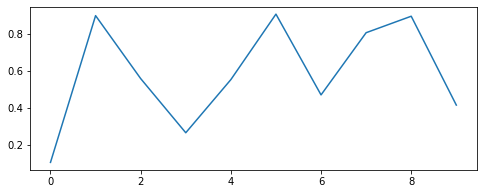

In [26]:
# START WITH A SIMPLE LINE PLOT-Default plot is a line plot
df2['c'].plot(figsize=(8,3));

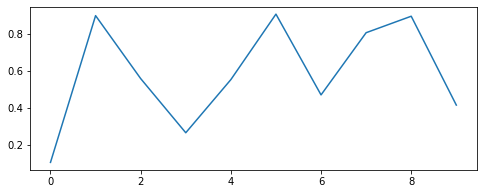

In [27]:
df2['c'].plot.line(figsize=(8,3));

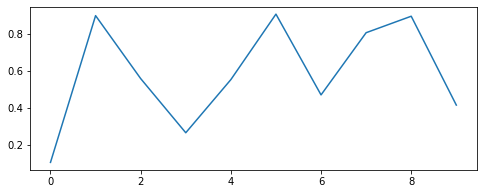

In [28]:
df2['c'].plot.line(figsize=(8,3),ls='-');

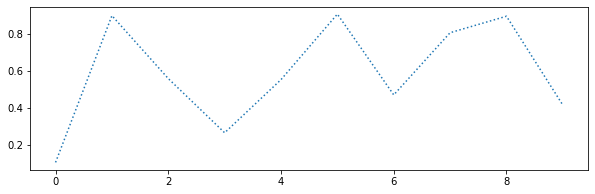

In [29]:
df2['c'].plot.line(figsize=(10,3),ls=':');

<table style="display: inline-block">
    <tr><th>PROPERTY</th><th>CODE</th><th>VALUE</th><th>EFFECT</th></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-'</tt></td><td>solid line (default)</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'--'</tt></td><td>dashed line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>'-.'</tt></td><td>dashed/dotted line</td></tr>
    <tr><td>linestyle</td><td><tt>ls</tt></td><td><tt>':'</tt></td><td>dotted line</td></tr>
    <tr><td>color</td><td><tt>c</tt></td><td>string</td><td></td></tr>
    <tr><td>linewidth</td><td><tt>lw</tt></td><td>float</td><td></td></tr>
</table>

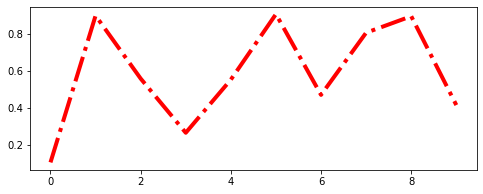

In [30]:
df2['c'].plot.line(ls='-.', c='r', lw='4', figsize=(8,3));

## Adding Titles and Axis Labels

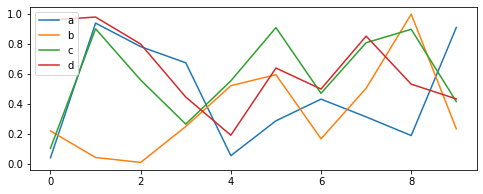

In [31]:
# START WITH A SIMPLE MULTILINE PLOT
df2.plot(figsize=(8,3));

Before we tackle the issue of legend placement, let's add a title and axis labels.

### Object-oriented plotting

When we call <tt>df.plot()</tt>, pandas returns a <tt>matplotlib.axes.AxesSubplot</tt> object. We can set labels
on that object so long as we do it in the same jupyter cell. Setting an autoscale is done the same way.

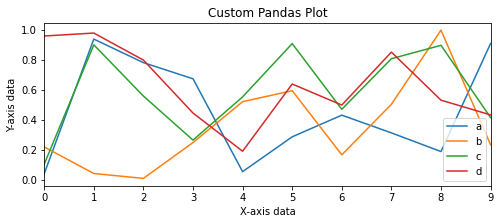

In [32]:
title='Custom Pandas Plot'
ylabel='Y-axis data'
xlabel='X-axis data'

ax = df2.plot(figsize=(8,3),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x',tight=True);

<font color=green>NOTE: The plot shrinks a bit so that the figure size can accommodate the new axis labels.</font>

## Plot Legend Placement
Pandas tries to optimize placement of the legend to reduce overlap on the plot itself. However, we can control the placement ourselves, and even place the legend outside of the plot. We do this through the <tt>.legend()</tt> method.


For starters we can pass a location code. <tt>.legend(loc=1)</tt> places the legend in the upper-right corner of the plot.<br>Alternatively we can pass a location string: <tt>.legend(loc='upper right')</tt> does the same thing.

<table style="display: inline-block">
<tr><th>LOCATION CODE</th><th>LOCATION STRING</th></tr>
<tr><td>0</td><td>'best'</td></tr>
<tr><td>1</td><td>'upper right'</td></tr>
<tr><td>2</td><td>'upper left'</td></tr>
<tr><td>3</td><td>'lower left'</td></tr>
<tr><td>4</td><td>'lower right'</td></tr>
<tr><td>5</td><td>'right'</td></tr>
<tr><td>6</td><td>'center left'</td></tr>
<tr><td>7</td><td>'center right'</td></tr>
<tr><td>8</td><td>'lower center'</td></tr>
<tr><td>9</td><td>'upper center'</td></tr>
<tr><td>10</td><td>'center'</td></tr>
</table>

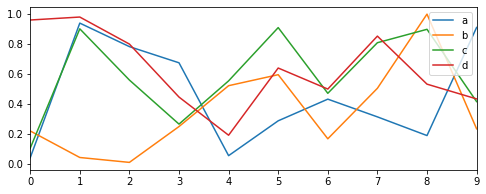

In [33]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=1);

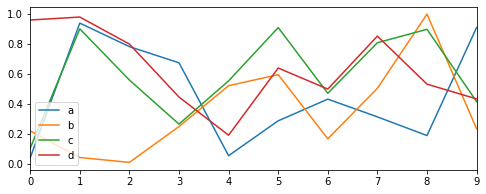

In [34]:
# FIRST, PLACE THE LEGEND IN THE LOWER-LEFT
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3);

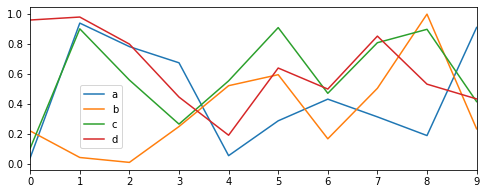

In [35]:
# NEXT, MOVE THE LEGEND A LITTLE TO THE RIGHT AND UP
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(0.1,0.1)); #You can shift by providing co-ordinates

### Placing the Legend Outside the Plot
In the above plot we passed <tt>(0.1,0.1)</tt> as our two-item tuple. This places the legend slightly to the right and slightly upward.<br>To place the legend outside the plot on the right-hand side, pass a value greater than or equal to 1 as the first item in the tuple.

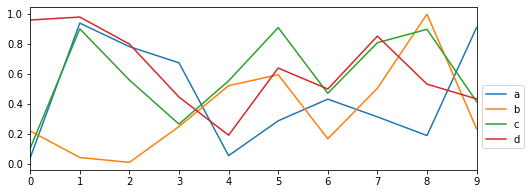

In [36]:
ax = df2.plot(figsize=(8,3))
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3, bbox_to_anchor=(1.0,0.1));

### &&&&&